# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [3]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('panda.jpg')
w, h = img.size
#img = img.resize((w//4, h//4)) # можно не делать .resize(())

# x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
# U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

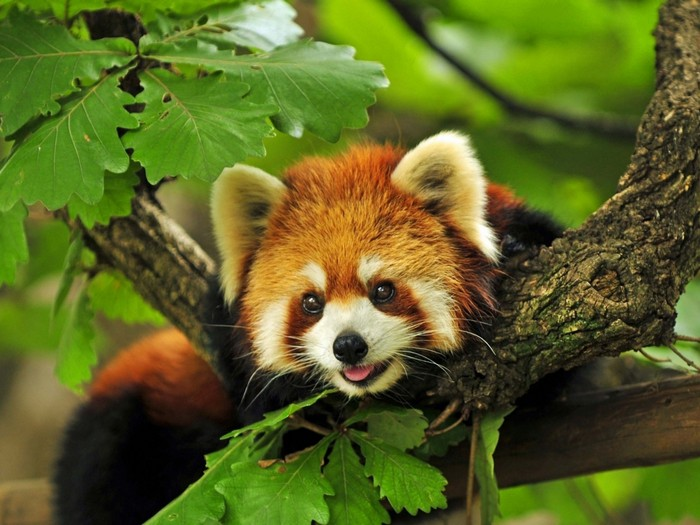

In [4]:
img

In [7]:
x = np.array(img) # преобразование из PIL в numpy array

In [9]:
x.dtype

dtype('uint8')

In [10]:
x = np.array([1, 80, 250], dtype=np.uint8)
x

array([  1,  80, 250], dtype=uint8)

In [11]:
x * 2

array([  2, 160, 244], dtype=uint8)

In [12]:
x - np.array([100, 100, 100], dtype=np.uint8)

array([157, 236, 150], dtype=uint8)

In [13]:
x = np.array(img, np.float64) # преобразование из PIL в numpy array

In [15]:
x.dtype

dtype('float64')

In [16]:
x.shape

(525, 700, 3)

In [20]:
U, s, Vt = np.linalg.svd(x[:,:,0], full_matrices=False) # разложение SVD
U.shape, s.shape, Vt.shape

((525, 525), (525,), (525, 700))

In [21]:
y = U.dot(np.diag(s).dot(Vt))

In [22]:
y.shape

(525, 700)

In [23]:
np.allclose(x[:,:,0], y)

True

In [24]:
r = 10
y_r = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))

In [26]:
np.linalg.norm(x[:,:,0] - y_r)

np.float64(13325.056733322572)

In [34]:
r = 10
x_new = x.copy()
for i in range(3):
    U, s, Vt = np.linalg.svd(x[:,:,i], full_matrices=False) # разложение SVD
    x_new[:, :, i] = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))

In [33]:
np.clip([0, 2, 3, 4, 5, 6], 1, 3)

array([1, 2, 3, 3, 3, 3])

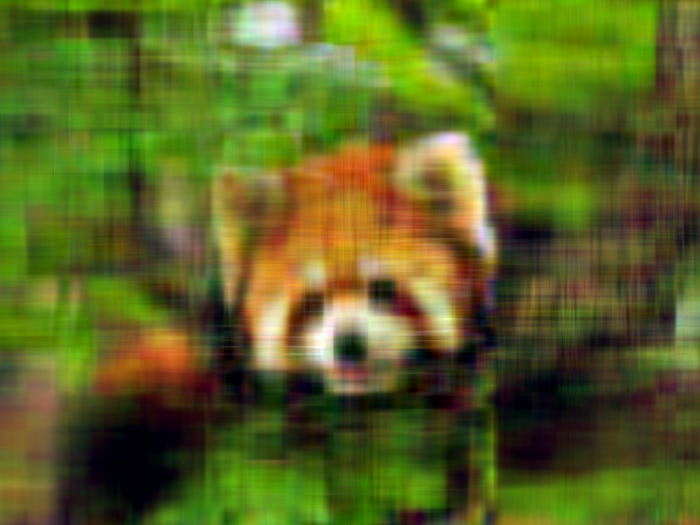

In [35]:
x_new = np.clip(x_new, 0, 255)
x_new = np.asarray(x_new, dtype=np.uint8)
Image.fromarray(x_new)#.save(f'{r}.png')

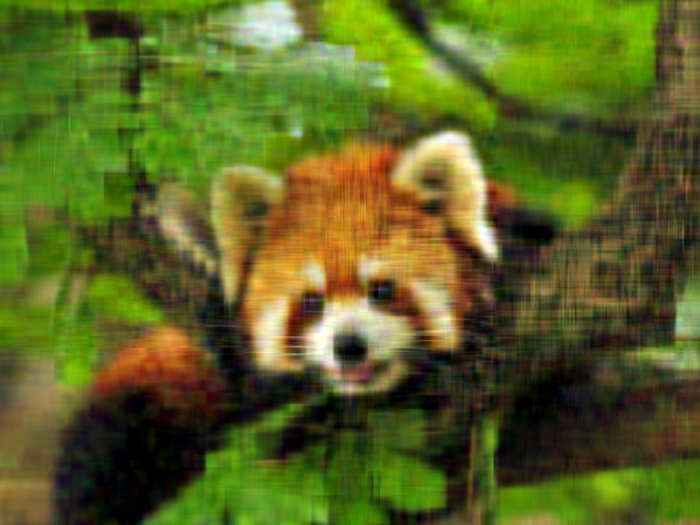

In [38]:
r = 20
x_new = x.copy()
for i in range(3):
    U, s, Vt = np.linalg.svd(x[:,:,i], full_matrices=False) # разложение SVD
    x_new[:, :, i] = U[:, :r].dot(np.diag(s[:r]).dot(Vt[:r]))

x_new = np.clip(x_new, 0, 255)
x_new = np.asarray(x_new, dtype=np.uint8)
Image.fromarray(x_new)#.save(f'{r}.png')